### Digital/searchable PDF text extraction
The text can simply be extracted from the PDF. To do so, specify the rectangle from which you want to extract the text.

In [1]:
import matplotlib.pyplot as plt

import io
import pymupdf
from PIL import Image

%matplotlib inline

In [2]:
pdf = pymupdf.open("resources/19335491.pdf")

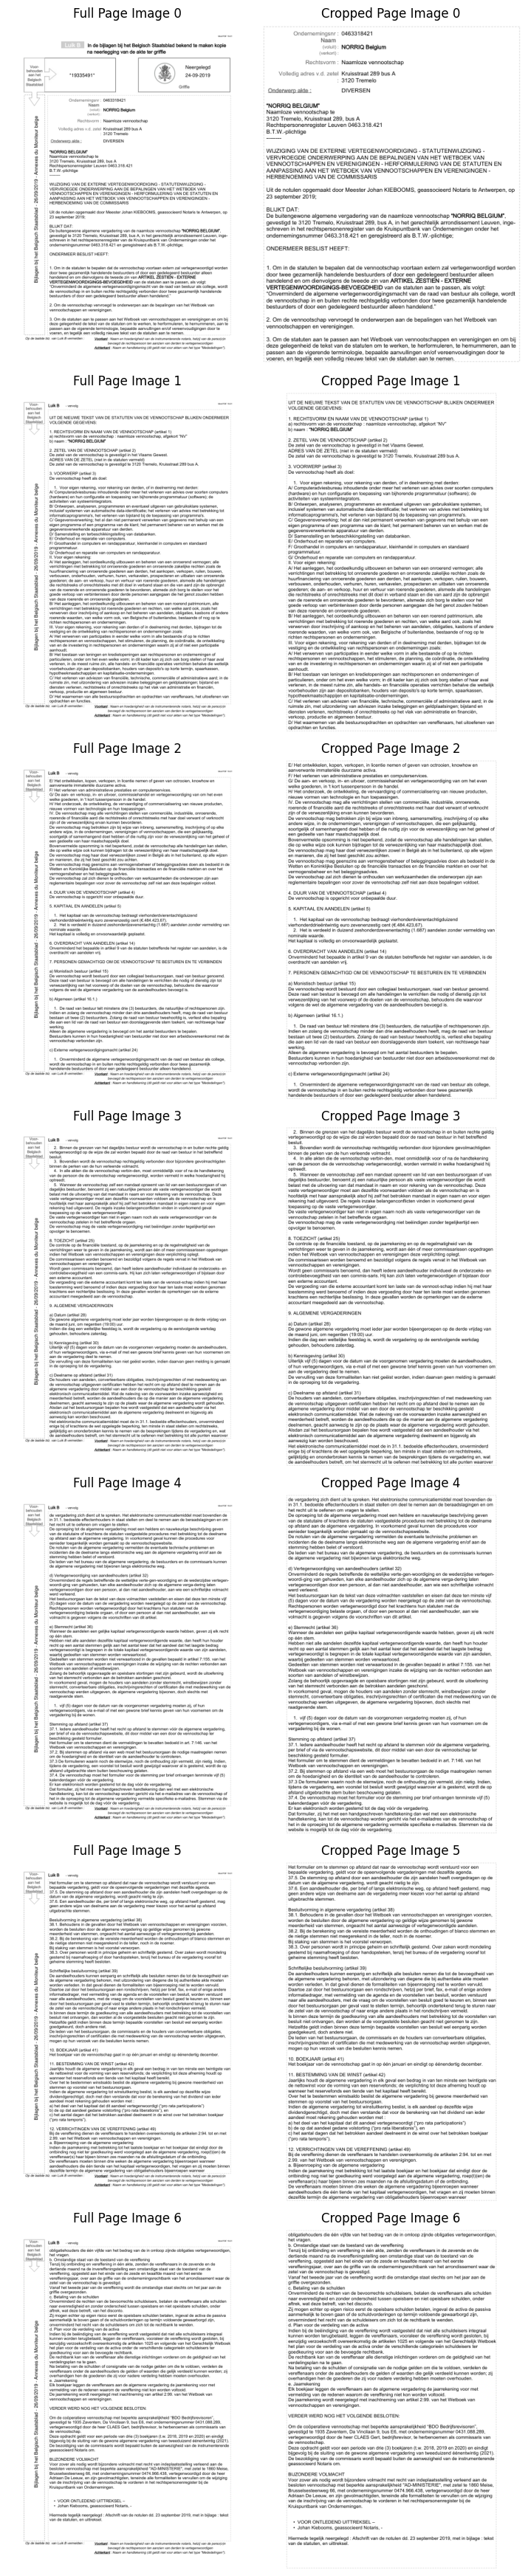

In [3]:
# rel coords are found by trial-and-error (top_left_x, top_left_y, bottom_right_x, bottom_right_y)
PAGE_0_REL_COORDS = (0.15966, 0.20485, 0.93277, 0.91950)
PAGE_N_REL_COORDS = (0.15966, 0.04899, 0.93277, 0.91950)

fig, axes = plt.subplots(len(pdf), 2, figsize=(7.5, 5 * len(pdf)))

for page in pdf:
    if page.number == 0:
        rel_coords = PAGE_0_REL_COORDS
    else:
        rel_coords = PAGE_N_REL_COORDS

    # full page image
    pix = page.get_pixmap()
    full_page = Image.open(io.BytesIO(pix.tobytes("png")))

    # area of interest wrt text extraction
    _, _, width, height = page.rect
    clip = (width, height, width, height)
    clip = tuple(left * right for left, right in zip(clip, rel_coords))
    pix = page.get_pixmap(clip=clip)
    cropped_page = Image.open(io.BytesIO(pix.tobytes("png")))

    # Plot the images side by side
    axes[page.number, 0].imshow(full_page)
    axes[page.number, 0].axis("off")
    axes[page.number, 0].set_title(f"Full Page Image {page.number}")

    axes[page.number, 1].imshow(cropped_page)
    axes[page.number, 1].axis("off")
    axes[page.number, 1].set_title(f"Cropped Page Image {page.number}")

plt.tight_layout()
plt.show()

The cropping looks okay, now instead of displaying it as image, extract the text. To do so, the code only needs to be slightly modified.

In [4]:
PAGE_0_REL_COORDS = (0.15966, 0.20485, 0.93277, 0.91950)
PAGE_N_REL_COORDS = (0.15966, 0.04899, 0.93277, 0.91950)

text = ""
for page in pdf:
    if page.number == 0:
        rel_coords = PAGE_0_REL_COORDS
    else:
        rel_coords = PAGE_N_REL_COORDS

    _, _, width, height = page.rect
    clip = (width, height, width, height)
    clip = tuple(left * right for left, right in zip(clip, rel_coords))

    page_text = page.get_textbox(clip)
    page_text = page_text if not text or text.endswith("\n") or page_text.startswith("\n") else "\n" + page_text
    text += page_text

print(text)

Ondernemingsnr : 0463318421
Naam
(voluit) : NORRIQ Belgium
(verkort) :
Rechtsvorm : Naamloze vennootschap
Volledig adres v.d. zetel Kruisstraat 289 bus A
 : 3120 Tremelo
Onderwerp akte :
DIVERSEN
“NORRIQ BELGIUM”
Naamloze vennootschap te
3120 Tremelo, Kruisstraat 289, bus A
Rechtspersonenregister Leuven 0463.318.421
B.T.W.-plichtige
--------
 
WIJZIGING VAN DE EXTERNE VERTEGENWOORDIGING - STATUTENWIJZIGING -
VERVROEGDE ONDERWERPING AAN DE BEPALINGEN VAN HET WETBOEK VAN
VENNOOTSCHAPPEN EN VERENIGINGEN - HERFORMULERING VAN DE STATUTEN EN
AANPASSING AAN HET WETBOEK VAN VENNOOTSCHAPPEN EN VERENIGINGEN -
HERBENOEMING VAN DE COMMISSARIS
 
Uit de notulen opgemaakt door Meester Johan KIEBOOMS, geassocieerd Notaris te Antwerpen, op
23 september 2019;
 
BLIJKT DAT:
De buitengewone algemene vergadering van de naamloze vennootschap “NORRIQ BELGIUM”,
gevestigd te 3120 Tremelo, Kruisstraat 289, bus A, in het gerechtelijk arrondissement Leuven, inge-
schreven in het rechtspersonenregister van de Krui